In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

In [4]:
plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)
orig_img = Image.open('pangu/annot/1_el-10_az-221_localel-35_localaz-108.png')

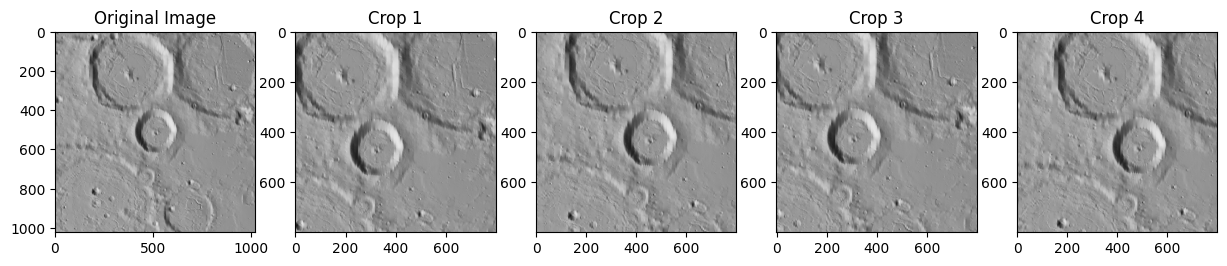

In [5]:
cropper = v2.RandomCrop(size=(800, 800))
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Crop {i+1}')

plt.show()


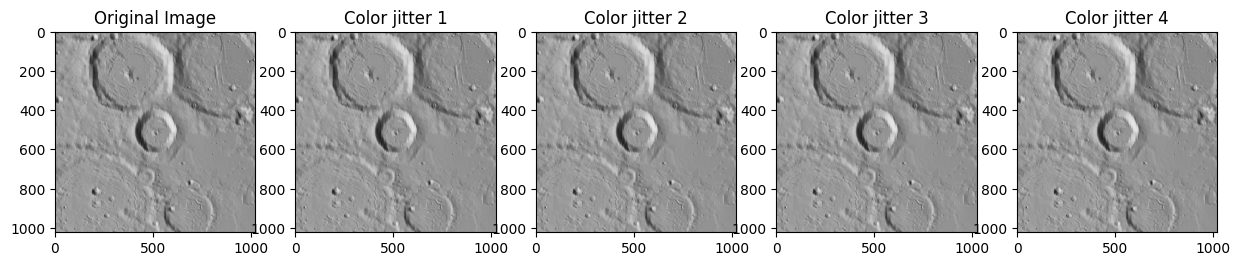

In [9]:
cropper = v2.ColorJitter(
    # brightness = (0.2, 2),
    # contrast = (0.5, 1.5),
    # saturation = (0.5, 1.5),
    hue = (-0.05, 0.05),
)
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Color jitter {i+1}')

plt.show()


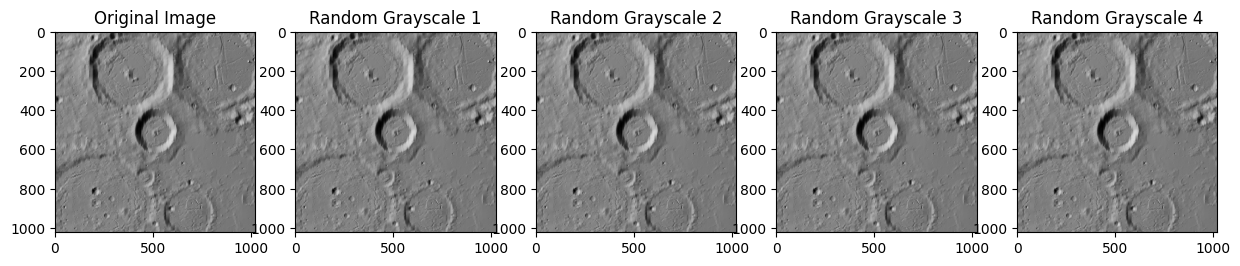

In [5]:
cropper = v2.RandomGrayscale()
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Grayscale {i+1}')

plt.show()


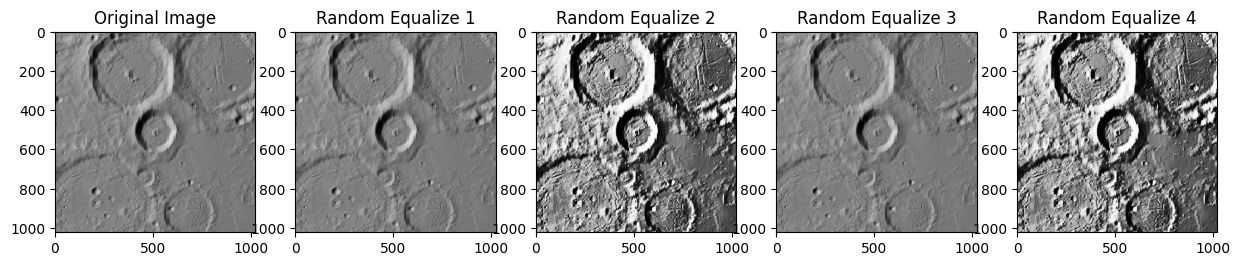

In [6]:
cropper = v2.RandomEqualize()
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Equalize {i+1}')

plt.show()


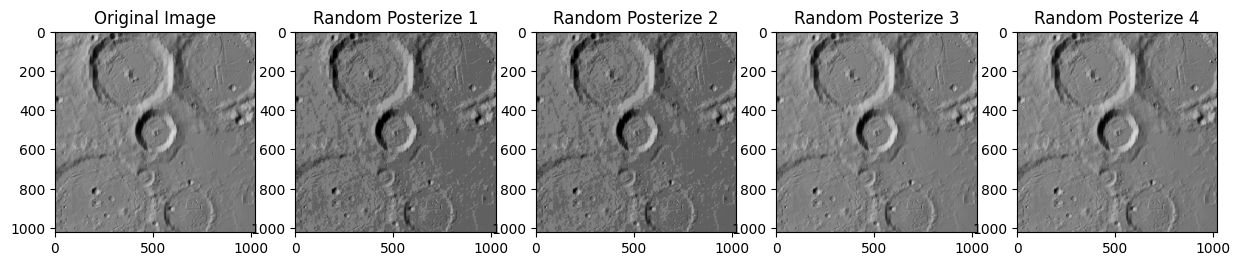

In [7]:
cropper = v2.RandomPosterize(bits=3, p=0.5)
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Posterize {i+1}')

plt.show()


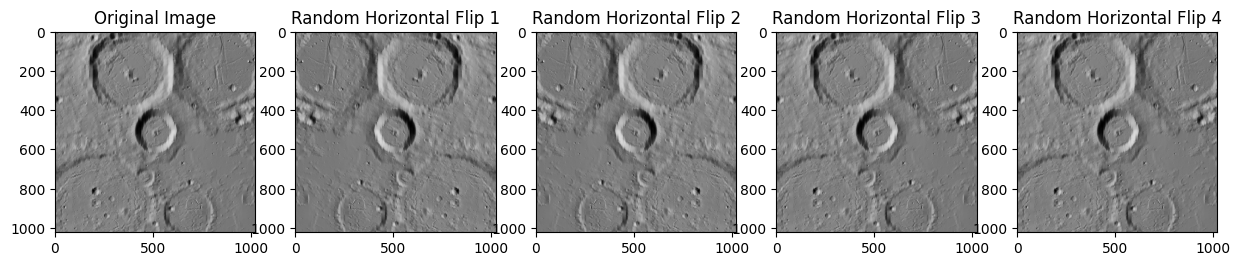

In [8]:
cropper = v2.RandomHorizontalFlip(p=0.8)
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Horizontal Flip {i+1}')

plt.show()


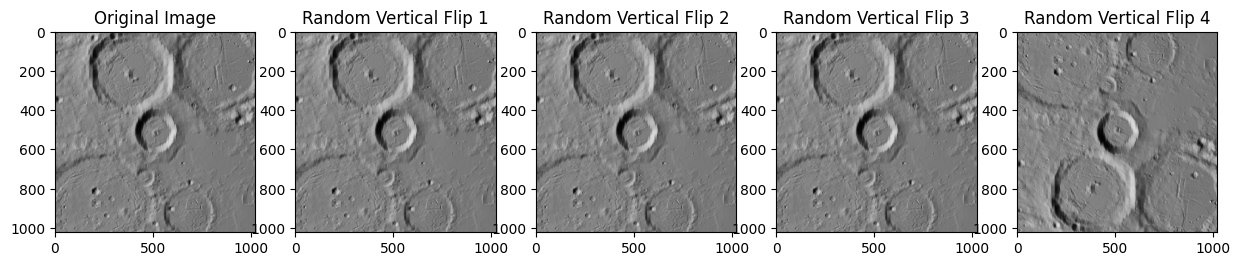

In [9]:
cropper = v2.RandomVerticalFlip(p=0.5)
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Vertical Flip {i+1}')

plt.show()


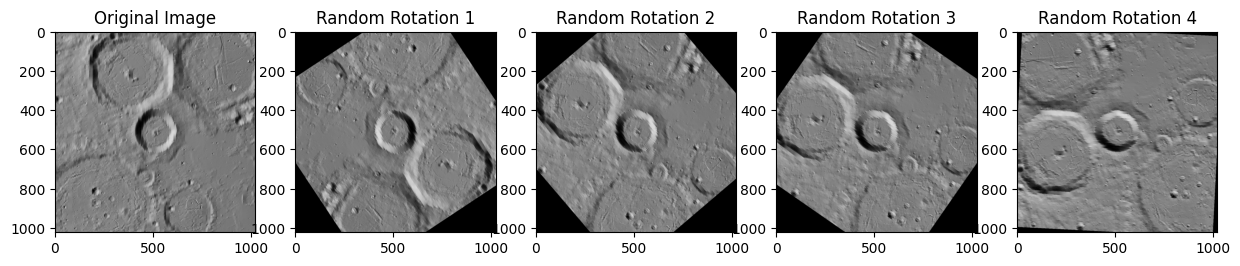

In [10]:
cropper = v2.RandomRotation(degrees=(0, 360))
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Plot original image
axs[0].imshow(orig_img)
axs[0].set_title('Original Image')

# Plot crops
for i, crop in enumerate(crops):
    axs[i+1].imshow(crop)
    axs[i+1].set_title(f'Random Rotation {i+1}')

plt.show()


NameError: name 'crop_bounding_box' is not defined

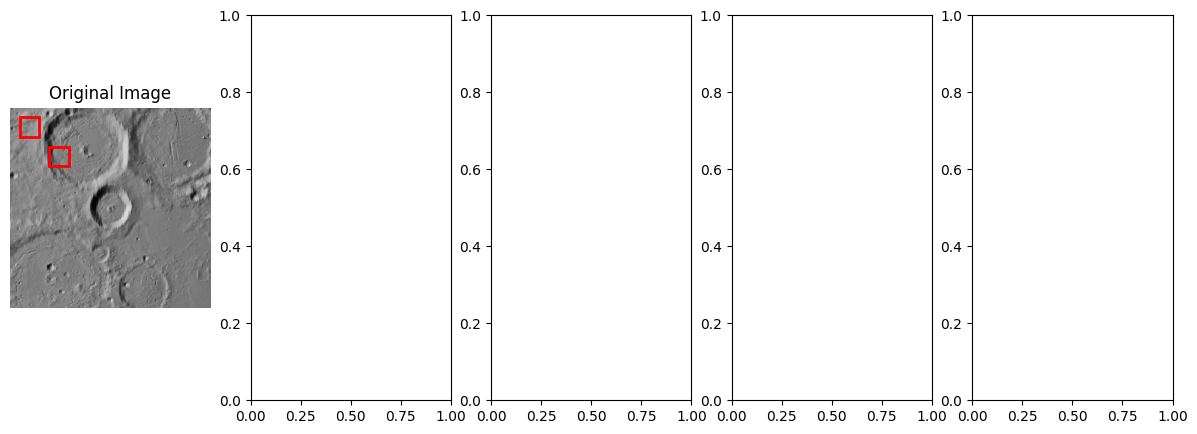

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms as v2
from PIL import Image

# Mock data: Original image and bounding boxes
# orig_img = Image.open('path_to_your_image.jpg')  # Replace with your image path
bounding_boxes = [(50, 50, 150, 150), (200, 200, 300, 300)]  # Replace with your bounding box coordinates

# Define the random perspective transformation
cropper = v2.RandomPerspective(distortion_scale=0.6, p=1)
crops = [cropper(orig_img) for _ in range(4)]
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

def plot_bounding_boxes(ax, img, boxes):
    ax.imshow(img)
    for (x_min, y_min, x_max, y_max) in boxes:
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    ax.set_axis_off()

# Plot original image with bounding boxes
plot_bounding_boxes(axs[0], orig_img, bounding_boxes)
axs[0].set_title('Original Image')

# Plot crops with transformed bounding boxes
for i, crop in enumerate(crops):
    transformed_boxes = [crop_bounding_box(bbox, cropper) for bbox in bounding_boxes]  # Transform bounding boxes according to perspective transformation
    plot_bounding_boxes(axs[i + 1], crop, transformed_boxes)
    axs[i + 1].set_title(f'Random Perspective {i + 1}')

plt.show()

def crop_bounding_box(bbox, cropper):
    # This function should transform the original bounding boxes according to the applied RandomPerspective transformation.
    # Note: You'll need to implement the logic for transforming the bounding boxes based on the cropper's parameters.
    # This usually involves calculating the transformation matrix used by RandomPerspective and applying it to the bbox coordinates.
    pass


In [3]:
import cv2
import os
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt



def preprocess(image_name, image_dir, label_dir):
    """
        Get image path, label path, label name
        image_name: For exxmaple img_0.png
        image_dir: original image directory
        label_dir: orrigianl label directory
    """
    image_path = os.path.sep.join([image_dir, image_name])
    # get name of image
    name = image_name.split('.')[0]
    label_name = name + '.txt'
    label_path = os.path.sep.join([label_dir, label_name])

    return image_path, label_path, label_name

def draw_rect(img, ellipses, color=(0, 255, 0)):
    """
        Draw bounding boxes on an image
    """
    # copy image
    img = img.copy()
    for ellipse in ellipses:
        x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse
        cv2.ellipse(img, (int(x_centre), int(y_centre)),
                        (int(semi_major_axis), int(semi_minor_axis)),
                        angle=rotation, startAngle=0, endAngle=360,
                        color=color, thickness=1)
    return img

def read_img(image_path, cvt_color=True):
    """
        Read image, convert from BGR (OpenCV) to RGB (Albumentation use that)
    """
    img = cv2.imread(image_path)
    if cvt_color:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # thấy ví dụ cần chuyển
    return img

def save_img(image, save_path, jpg_quality=None):
    """
        Save image with option to compress image
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)   # do ảnh từ albumentation là RGB

    if jpg_quality:
        cv2.imwrite(save_path, image, [int(cv2.IMWRITE_JPEG_QUALITY), jpg_quality])
    else:
        cv2.imwrite(save_path, image)

def display_img(image_path, label_path):
    """
        Display image with bounding boxes
    """
    img = read_img(image_path, cvt_color=False)
    ellipses = read_label(label_path)[0]
    img = draw_rect(img, ellipses)
    plt.imshow(img)
    plt.show()
    

def read_label(label_path):
    """
        Read label from label file .txt (YOLO format)
    """
    ellipses = []
    class_labels = []
    
    with open(label_path, 'r') as f:
        lines = f.readlines()[1:]
        
        
        for line in lines:
            data = line.strip().split(',')
            x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = map(float, data)
            
            ellipses.append((x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))
            class_labels.append('crater')
    return ellipses, class_labels

def save_label(ellipses, label_path):
    """
        Save the label
    """
    # create an empty list
    header = "ellipse: x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation"

    # write to the file
    with open(label_path, 'w') as f:
        f.write(header)
        for ellipse in ellipses:
            line = ', '.join(map(str, ellipse)) + '\n'
            f.write(line)

"""
    Chuyển bboxes ở dạng list (nested list) và class_labels ở dạng list để tạo lại file label
    ['1 0.221094 0.339583 0.051562 0.101389\n', '1 0.530469 0.517361 0.053125 0.129167\n']
    Khi đọc hết file label sẽ có dạng như này, tận dụng nó để tạo lại file label
"""

"\n    Chuyển bboxes ở dạng list (nested list) và class_labels ở dạng list để tạo lại file label\n    ['1 0.221094 0.339583 0.051562 0.101389\n', '1 0.530469 0.517361 0.053125 0.129167\n']\n    Khi đọc hết file label sẽ có dạng như này, tận dụng nó để tạo lại file label\n"

In [4]:
def random_crop_savebboxes(image_name, image_dir, label_dir, expected_h, expected_w):
    """
        Implement random crop image
        image_name: for example img_0.jpg
        image_dir: original image directory
        label_dir: orrigianl label directory
        expected_h: expected height of the image, it depends on the scale_y
        expected_w: expected width of the image, it depends on the scale_x
        min_area: threshol of area of bounding boxes. If area of box after augmentation < min_area, we will drop that box.
        min_visibility: [0, 1]  If the ratio of the box area after augmentation to the area of the box before augmentation 
                                becomes smaller than min_visibility, we will drop that box.
    """
    image_path, label_path, _ =  preprocess(image_name, image_dir, label_dir)
    image = read_img(image_path)
    ellipses, class_labels = read_label(label_path)

    transform = A.Compose([A.RandomResizedCrop(expected_h, expected_w)]) 
    transformed = transform(image=image) 
    transformed_image = transformed['image']
    
    # Extract the cropping parameters
    params = transformed.get('params', {})  # Check if 'params' key exists in the transformed dictionary
    x_min = params.get('crop_x_min', 0)  # Set default value if key does not exist
    y_min = params.get('crop_y_min', 0)  # Set default value if key does not exist
    x_max = params.get('crop_x_max', 0)  # Set default value if key does not exist
    y_max = params.get('crop_y_max', 0)  # Set default value if key does not exist
    
    # Calculate the scale factors
    scale_x = expected_w / (x_max - x_min)
    scale_y = expected_h / (y_max - y_min)

    transformed_ellipses = []
    for ellipse in ellipses:
        x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse
        
        new_cx, new_cy = x_centre * scale_x, y_centre * scale_y
        
        cos_rotation = np.cos(rotation)
        sin_rotation = np.sin(rotation)

        # Calculate the scaling factors for the axes
        new_semi_major = semi_major_axis * (cos_rotation * scale_x + sin_rotation * scale_y)
        new_semi_minor = semi_minor_axis * (sin_rotation * scale_x + cos_rotation * scale_y)
        
        transformed_ellipses.append((new_cx, new_cy, new_semi_major, new_semi_minor, rotation))

    return transformed_image, transformed_ellipses, class_labels


In [5]:
def mosaic(image_file_list, image_dir, label_dir, output_image_dir, output_label_dir, mo_w, mo_h, scale_x, scale_y):
    """
        Implement mosaic augmentation
        image_file_list: list of 4 images (only name of image, not path), [img_1.jpg, img_2.jpg, img_3.png, img_4.jpeg]
        image_dir: original image directory
        label_dir: orrigianl label directory
        output_image_dir: path of directory for mosaic images
        output_label_dir: path of directory for new labels
        mo_h: height of mosaic-augmented image
        mo_w: width of mosaic-augmented image
        min_area: threshol of area of bounding boxes. If area of box after augmentation < min_area, we will drop that box.
        min_visibility: [0, 1]  If the ratio of the box area after augmentation to the area of the box before augmentation 
                                becomes smaller than min_visibility, we will drop that box.
    """
    # creat a new image
    new_img = np.zeros((mo_h, mo_w, 3), dtype='uint8')     # 3 channels

    # split points
    div_point_x = int(mo_w * scale_x)
    div_point_y = int(mo_h * scale_x)

    # loop through images
    for i in range(len(image_file_list)):
        # top left image, img_0
        if i == 0:
            # width and height of the top left image
            w0 = div_point_x
            h0 = div_point_y
            img_0, ellipses_0, class_labels_0 = random_crop_savebboxes(image_file_list[0], image_dir, label_dir, h0, w0)
            # top left
            new_img[:div_point_y, :div_point_x, :] = img_0 

            # change parameters of bboxes for the top left image, chú ý bboxes ở dạng list of tuple mà tuple ko cho gán nên ta tạo list mới
            if len(ellipses_0) == 0:  # there is no boxes
                ellipses_0_new = []
            else:
                # !!! Don't create nested list as follow: bboxes_0_new = [[None, None, None, None]] * len(bboxes_0)
                # because inner lists have the same id => incorrect result when perform operations.

                # nested list for bboxes
                ellipses_0_new = np.zeros((len(ellipses_0), 5))
                # convert to list
                ellipses_0_new = ellipses_0_new.tolist()

            for i, ellipse in enumerate(ellipses_0):
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse #radian
                
                # # Scaling the semi-major and semi-minor axes according to rotation
                # cos_rotation = np.cos(rotation)
                # sin_rotation = np.sin(rotation)

                # # Calculate the scaling factors for the axes
                # new_semi_major = semi_major_axis * (cos_rotation * scale_x + sin_rotation * scale_y)
                # new_semi_minor = semi_minor_axis * (sin_rotation * scale_x + cos_rotation * scale_y)
                
                ellipses_0_new[i][0] = x_centre  # xcenter
                ellipses_0_new[i][1] = y_centre  # ycenter
                ellipses_0_new[i][2] = semi_major_axis  # semi_major
                ellipses_0_new[i][3] = semi_minor_axis  # semi_minor
                ellipses_0_new[i][4] = rotation  # rotation
                
        # top right image
        elif i == 1:
            w1 = mo_w - div_point_x     # trừ sẽ khớp
            h1 = div_point_y    # giữ nguyên như cái i=0
            img_1, ellipses_1, class_labels_1 = random_crop_savebboxes(image_file_list[1], image_dir, label_dir, h1, w1)
            new_img[:div_point_y, div_point_x:, :] = img_1

            # change bboxes
            if len(ellipses_1) == 0:  # TH không có bboxes nào
                ellipses_1_new = []
            else:
                ellipses_1_new = np.zeros((len(ellipses_1), 5))
                # convert to list
                ellipses_1_new = ellipses_1_new.tolist()

            for i, ellipse in enumerate(ellipses_1):
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse #radian
                
                # Scaling the semi-major and semi-minor axes according to rotation
                cos_rotation = np.cos(rotation)
                sin_rotation = np.sin(rotation)

                # Calculate the scaling factors for the axes
                new_semi_major = semi_major_axis * (cos_rotation * scale_x + sin_rotation * scale_y)
                new_semi_minor = semi_minor_axis * (sin_rotation * scale_x + cos_rotation * scale_y)
                
                # ellipses_1_new[i][0] = x_centre + div_point_x  # xcenter
                # ellipses_1_new[i][1] = y_centre  # ycenter
                # ellipses_1_new[i][2] = new_semi_major  # semi_major
                # ellipses_1_new[i][3] = new_semi_minor  # semi_minor
                # ellipses_1_new[i][4] = rotation  # rotation
        
        # bottom left image
        elif i == 2:
            w2 = div_point_x
            h2 = mo_h - div_point_y
            img_2, ellipses_2, class_labels_2 = random_crop_savebboxes(image_file_list[2], image_dir, label_dir, h2, w2)
            new_img[div_point_y:, :div_point_x, :] = img_2

            # change bboxes
            if len(ellipses_2) == 0:  # there is no boxes
                ellipses_2_new = []
            else:
                ellipses_2_new = np.zeros((len(ellipses_2), 5))
                # convert to list
                ellipses_2_new = ellipses_2_new.tolist()

            for i, ellipse in enumerate(ellipses_2):
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse #radian
                
                # Scaling the semi-major and semi-minor axes according to rotation
                cos_rotation = np.cos(rotation)
                sin_rotation = np.sin(rotation)

                # Calculate the scaling factors for the axes
                new_semi_major = semi_major_axis * (cos_rotation * scale_x + sin_rotation * scale_y)
                new_semi_minor = semi_minor_axis * (sin_rotation * scale_x + cos_rotation * scale_y)
                
                # ellipses_2_new[i][0] = x_centre * scale_x  # xcenter
                # ellipses_2_new[i][1] = y_centre * (1 - scale_y) + scale_y  # ycenter
                # ellipses_2_new[i][2] = new_semi_major  # semi_major
                # ellipses_2_new[i][3] = new_semi_minor  # semi_minor
                # ellipses_2_new[i][4] = rotation  # rotation

        # bottom right image
        else:
            w3 = mo_w - div_point_x
            h3 = mo_h - div_point_y
            img_3, ellipses_3, class_labels_3 = random_crop_savebboxes(image_file_list[3], image_dir, label_dir, h3, w3)
            new_img[div_point_y:, div_point_x:, :] = img_3 

            # change bboxes
            if len(ellipses_3) == 0:  # there is no boxes
                ellipses_3_new = []
            else:
                ellipses_3_new = np.zeros((len(ellipses_3), 5))
                # convert to list
                ellipses_3_new = ellipses_3_new.tolist()

            for i, ellipse in enumerate(ellipses_3):
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse #radian
                
                # Scaling the semi-major and semi-minor axes according to rotation
                cos_rotation = np.cos(rotation)
                sin_rotation = np.sin(rotation)

                # Calculate the scaling factors for the axes
                new_semi_major = semi_major_axis * (cos_rotation * scale_x + sin_rotation * scale_y)
                new_semi_minor = semi_minor_axis * (sin_rotation * scale_x + cos_rotation * scale_y)
                
                # ellipses_3_new[i][0] = x_centre * (1 - scale_x) + scale_x # xcenter
                # ellipses_3_new[i][1] = y_centre * (1 - scale_y) + scale_y  # ycenter
                # ellipses_3_new[i][2] = new_semi_major  # semi_major
                # ellipses_3_new[i][3] = new_semi_minor  # semi_minor
                # ellipses_3_new[i][4] = rotation  # rotation

    # all bounding boxex in the augmented image
    new_ellipses = ellipses_0_new + ellipses_1_new + ellipses_2_new + ellipses_3_new 

    # path to save image and label
    image_store_path = os.path.sep.join([output_image_dir, 'mo_' + image_file_list[0].split('.')[0] + '_' + image_file_list[1].split('.')[0] + '_' + image_file_list[2].split('.')[0] + '_' + image_file_list[3].split('.')[0] + '.jpg'])
    label_store_path = os.path.sep.join([output_label_dir, 'mo_' + image_file_list[0].split('.')[0] + '_' + image_file_list[1].split('.')[0] + '_' + image_file_list[2].split('.')[0] + '_' + image_file_list[3].split('.')[0] + '.txt'])
    
    # save the augmented image and labels (bounding boxes)
    save_img(new_img, image_store_path )
    save_label(new_ellipses, label_store_path)

    """ If you want to see the augmented with their bounding boxes, if not please COMMENT row below """
    display_img(image_store_path, label_store_path)


In [6]:
import random

mo_w = 1024
mo_h = 1024

scale_x = 0.5
scale_y = 0.5
if not os.path.exists('augmentation/mosaic_images'):  
        os.makedirs('augmentation/mosaic_images')     

# output dir for augmented images
output_image_dir = 'augmentation/mosaic_images'

if not os.path.exists('augmentation/mosaic_labels'):  
    os.makedirs('augmentation/mosaic_labels')    

# output dir for new boxes
output_label_dir = 'augmentation/mosaic_labels'

"""
    Note: Image and label have the same name. For example: image_1.jpeg - image_1.txt
"""
print('Processing...')
image_dir = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_0deg_off_nadir/ground_truth_images'
label_dir = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_0deg_off_nadir/ground_truth_projected_ellipses'

# get a list of all images
list_image_names = os.listdir(image_dir)[:4]    
# randomly get 4 images
image_file_list = random.choices(list_image_names, k=4)
# perform augmentation
mosaic(image_file_list, image_dir, label_dir, output_image_dir, output_label_dir, mo_w, mo_h, scale_x, scale_y)

Processing...


ZeroDivisionError: division by zero

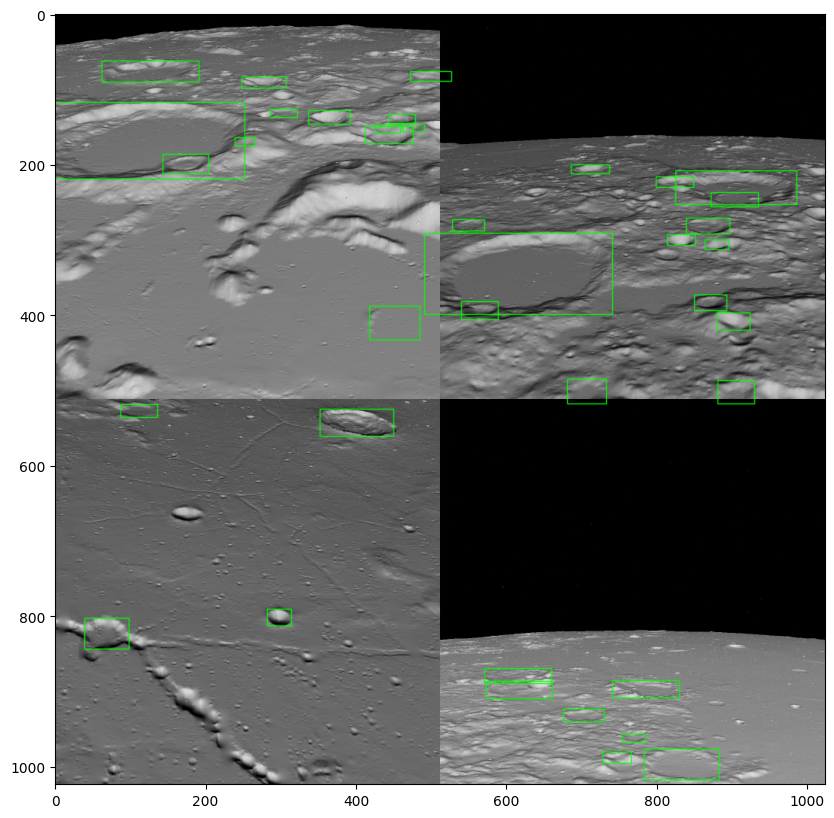

In [2]:
import random

import cv2
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


ANNO_DIR = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_0deg_off_nadir/ground_truth_bounding_boxes'
IMG_DIR = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_0deg_off_nadir/ground_truth_images'

category_name = ['background', 'crater']


def main():
    img_paths, annos = get_dataset(ANNO_DIR, IMG_DIR)
    idxs = random.sample(range(len(annos)), 4)

    new_image, new_annos = update_image_and_anno(img_paths, annos, idxs)
    for anno in new_annos:

        cv2.rectangle(new_image, (int(anno[1]), int(anno[2])), (int(anno[3]), int(anno[4])), (0, 255, 0), 1, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(new_image)
    plt.show()

def update_image_and_anno(all_img_list, all_annos, idxs):
    output_size = (1024, 1024)
    output_img = np.zeros([output_size[0], output_size[1], 3], dtype=np.uint8)
    scale_x = 0.5
    scale_y = 0.5
    divid_point_x = int(scale_x * output_size[1])
    divid_point_y = int(scale_y * output_size[0])

    new_anno = []
    for i, idx in enumerate(idxs):
        path = all_img_list[idx]
        img_annos = all_annos[idx]

        img = cv2.imread(path)
        if i == 0:  # top-left
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[:divid_point_y, :divid_point_x, :] = img
            
            for bbox in img_annos:
                xmin = bbox[1]
                ymin = bbox[2]
                xmax = bbox[3]
                ymax = bbox[4]
                area = (xmax - xmin) * (ymax - ymin)
                if area > 200:
                    new_anno.append([bbox[0], xmin, ymin, xmax, ymax])

        elif i == 1:  # top-right
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[:divid_point_y, divid_point_x:output_size[1], :] = img
            
            for bbox in img_annos:
                xmin = bbox[1] + 1024 - 1024*scale_x
                ymin = bbox[2]
                xmax = bbox[3] + 1024 - 1024*scale_x
                ymax = bbox[4]
                area = (xmax - xmin) * (ymax - ymin)
                if area > 200:
                    new_anno.append([bbox[0], xmin, ymin, xmax, ymax])
        elif i == 2:  # bottom-left
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[divid_point_y:output_size[0], :divid_point_x, :] = img
            
            for bbox in img_annos:
                xmin = bbox[1] 
                ymin = bbox[2] + 1024 - 1024*scale_y
                xmax = bbox[3] 
                ymax = bbox[4] + 1024 - 1024*scale_y
                
                area = (xmax - xmin) * (ymax - ymin)
                if area > 200:
                    new_anno.append([bbox[0], xmin, ymin, xmax, ymax])
        else:  # bottom-right
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[divid_point_y:output_size[0], divid_point_x:output_size[1], :] = img
            
            for bbox in img_annos:
                xmin = bbox[1] + 1024 - 1024*scale_x
                ymin = bbox[2] + 1024 - 1024*scale_y
                xmax = bbox[3] + 1024 - 1024*scale_x
                ymax = bbox[4] + 1024 - 1024*scale_y

                area = (xmax - xmin) * (ymax - ymin)
                if area > 200:
                    new_anno.append([bbox[0], xmin, ymin, xmax, ymax])
    return output_img, new_anno

def random_crop_and_filter(image, bboxes, crop_size=(512, 512)):
    h, w, _ = image.shape
    crop_h, crop_w = crop_size

    # Ensure the crop size is not larger than the image size
    if crop_h > h or crop_w > w:
        raise ValueError("Crop size should be smaller than the image size")

    # Randomly select the top-left corner of the crop
    top = random.randint(0, h - crop_h)
    left = random.randint(0, w - crop_w)

    # Perform the crop
    cropped_image = image[top:top + crop_h, left:left + crop_w]
    
    
    
    # Adjust bounding boxes
    new_bboxes = []
    for bbox in bboxes:
        label, xmin, ymin, xmax, ymax = bbox
     
        in_xmin = max(left, xmin)
        in_ymin = max(top, ymin)
        in_xmax = min(left + crop_w, xmax)
        in_ymax = min(top + crop_h, ymax)
        # Check if there is any overlap
        if in_xmin < in_xmax and in_ymin < in_ymax:
            # Calculate the area of the original and intersection bounding boxes
            original_area = (xmax - xmin) * (ymax - ymin)
            in_area = (in_xmax - in_xmin) * (in_ymax - in_ymin)

            # Filter based on the area criteria
            if in_area >= original_area*(2/3):
                # Adjust coordinates to the new cropped image
                new_xmin = xmin - left
                new_ymin = ymin - top
                new_xmax = xmax - left
                new_ymax = ymax - top
                new_bboxes.append([label, new_xmin, new_ymin, new_xmax, new_ymax])
    
    return cropped_image, new_bboxes

def get_dataset(anno_dir, img_dir):
    class_id = category_name.index('crater')

    img_paths = []
    annos = []
    for anno_file in glob.glob(os.path.join(anno_dir, '*.txt')):
        anno_id = anno_file.split('/')[-1].split('.')[0]
        boxes = []
        with open(anno_file, 'r') as f:
            lines = f.readlines()[1:]
            for line in lines:
                data = line.strip().split(',')
                x1, y1, x2, y2 = map(int, data)
                boxes.append((class_id, int(x1), int(y1), int(x2), int(y2)))

        img_paths.append(os.path.join(img_dir, f"{anno_id}.png"))
        annos.append(boxes)
        
    return img_paths, annos

main()

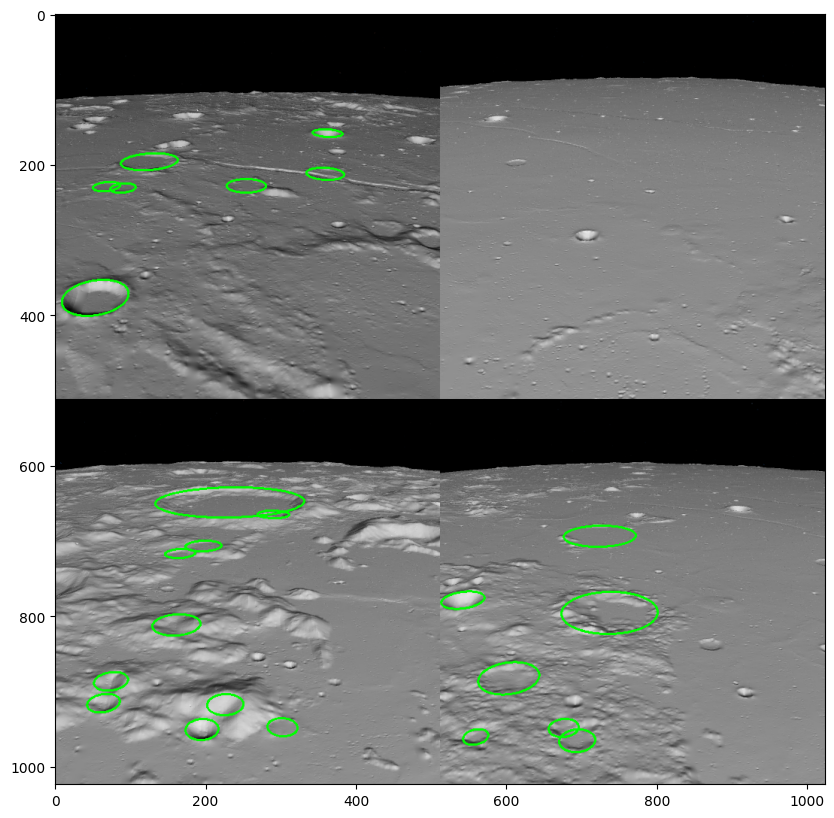

In [21]:
import random

import cv2
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


ANNO_DIR = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_60deg_off_nadir/ground_truth_projected_ellipses'
IMG_DIR = 'data/fixed_sofia_data/processed_real_lunar_data_complete_height_adjusted/LDEM_0_75E_0_30N_float_60fov_1024_1024_60deg_off_nadir/ground_truth_images'

category_name = ['background', 'crater']


def main():
    img_paths, annos = get_dataset(ANNO_DIR, IMG_DIR)
    idxs = random.sample(z, 4)

    new_image, new_annos = update_image_and_anno(img_paths, annos, idxs)
    for anno in new_annos:
        label, x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = anno
        rotation = np.degrees(rotation)
        cv2.ellipse(new_image, (int(x_centre), int(y_centre)),
                            (int(semi_major_axis), int(semi_minor_axis)),
                            angle=rotation, startAngle=0, endAngle=360,
                            color=(0, 255, 0), thickness=2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(new_image)
    plt.show()

def update_image_and_anno(all_img_list, all_annos, idxs):
    output_size = (1024, 1024)
    output_img = np.zeros([output_size[0], output_size[1], 3], dtype=np.uint8)
    scale_x = 0.5
    scale_y = 0.5
    divid_point_x = int(scale_x * output_size[1])
    divid_point_y = int(scale_y * output_size[0])

    new_anno = []
    for i, idx in enumerate(idxs):
        path = all_img_list[idx]
        img_annos = all_annos[idx]

        img = cv2.imread(path)
        if i == 0:  # top-left
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[:divid_point_y, :divid_point_x, :] = img
            
            for ellipse in img_annos:
                x_centre = ellipse[1]
                y_centre = ellipse[2]
                semi_major_axis = ellipse[3]
                semi_minor_axis = ellipse[4]
                rotation = ellipse[5]
            
                area = np.pi * semi_major_axis * semi_minor_axis
                if area > 0:
                    new_anno.append((ellipse[0], x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))

        elif i == 1:  # top-right
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[:divid_point_y, divid_point_x:output_size[1], :] = img
            
            for ellipse in img_annos:
                x_centre = ellipse[1] + 1024 - 1024*scale_x
                y_centre = ellipse[2]
                semi_major_axis = ellipse[3]
                semi_minor_axis = ellipse[4]
                rotation = ellipse[5]
                
                area = np.pi * semi_major_axis * semi_minor_axis
                if area > 0:
                    new_anno.append((ellipse[0], x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))

        elif i == 2:  # bottom-left
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[divid_point_y:output_size[0], :divid_point_x, :] = img
            
            for ellipse in img_annos:
                x_centre = ellipse[1] 
                y_centre = ellipse[2] + 1024 - 1024*scale_y
                semi_major_axis = ellipse[3]
                semi_minor_axis = ellipse[4]
                rotation = ellipse[5]
                
                area = np.pi * semi_major_axis * semi_minor_axis
                if area > 0:
                    new_anno.append((ellipse[0], x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))
        else:  # bottom-right
            img, img_annos = random_crop_and_filter(img, img_annos)
            output_img[divid_point_y:output_size[0], divid_point_x:output_size[1], :] = img
            
            for ellipse in img_annos:
                x_centre = ellipse[1] + 1024 - 1024*scale_x
                y_centre = ellipse[2] + 1024 - 1024*scale_y
                semi_major_axis = ellipse[3]
                semi_minor_axis = ellipse[4]
                rotation = ellipse[5]
                
                area = np.pi * semi_major_axis * semi_minor_axis
                if area > 0:
                    new_anno.append((ellipse[0], x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))
    return output_img, new_anno

def random_crop_and_filter(image, ellipses, crop_size=(512, 512)):
    h, w, _ = image.shape
    crop_h, crop_w = crop_size

    # Ensure the crop size is not larger than the image size
    if crop_h > h or crop_w > w:
        raise ValueError("Crop size should be smaller than the image size")

    # Randomly select the top-left corner of the crop
    top = random.randint(0, h - crop_h)
    left = random.randint(0, w - crop_w)

    # Perform the crop
    cropped_image = image[top:top + crop_h, left:left + crop_w]
    
    # Adjust bounding boxes
    transformed_ellipses = []
    for ellipse in ellipses:
        label, x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = ellipse
        edge_threshold = semi_major_axis * np.cos(rotation) * 0.5
        if (x_centre > left + edge_threshold and x_centre < left + crop_w - edge_threshold) and \
           (y_centre > top + edge_threshold and y_centre < top + crop_h - edge_threshold):
            new_cx, new_cy = x_centre - left, y_centre - top

            transformed_ellipses.append((label, new_cx, new_cy, semi_major_axis, semi_minor_axis, rotation))

    return cropped_image, transformed_ellipses

def get_dataset(anno_dir, img_dir):
    class_id = category_name.index('crater')

    img_paths = []
    annos = []
    for anno_file in glob.glob(os.path.join(anno_dir, '*.txt')):
        anno_id = anno_file.split('/')[-1].split('.')[0]
        ellipses = []
        with open(anno_file, 'r') as f:
            lines = f.readlines()[1:]
            for line in lines:
                data = line.strip().split(',')
                x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation = map(float, data)
                ellipses.append((class_id, x_centre, y_centre, semi_major_axis, semi_minor_axis, rotation))

        img_paths.append(os.path.join(img_dir, f"{anno_id}.png"))
        annos.append(ellipses)
        
    return img_paths, annos

main()